# Exploring the LA Crime Data

The LA crime data is for the years 2012-2016. The data we are exploring in this notebook has already been cleaned. 

## Importing Libraries

In [2]:
import math
import numpy as np
import pandas as pd
from matplotlib import path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Loading the Data

Below, we are creating a dataframe, where we load the cleaned data.

In [3]:
crime_data = pd.read_csv("LAcrime2012-2016.csv")

Looking at the column names of the crime_data dataframe.

In [4]:
print list(crime_data.columns)

['Unnamed: 0', 'year_id', 'date_rptd', 'dr_no', 'date_occ', 'time_occ', 'area', 'area_name', 'rd', 'crm_cd', 'crm_cd_desc', 'status', 'status_desc', 'location', 'cross_st', 'lat', 'long', 'year', 'month', 'day_of_month', 'hour_of_day', 'year_month', 'day_of_week', 'weekday', 'intersection', 'simple_bucket']



Dropping the "Unnamed: 0" column from the crime_data dataframe.

In [5]:
crime_data.drop(crime_data.columns[crime_data.columns.get_loc("Unnamed: 0")], axis=1, inplace=True)


Taking a quick look at the head of crime_data dataframe.

In [6]:
crime_data.head(3)

,year_id,date_rptd,dr_no,date_occ,time_occ,area,area_name,rd,crm_cd,crm_cd_desc,...,long,year,month,day_of_month,hour_of_day,year_month,day_of_week,weekday,intersection,simple_bucket
0,2012,2013-01-02,120101610,2012-12-31,240,1,Central,158,761,BRANDISH WEAPON,...,-118.2413,2012,12,31,2,2012-12,Monday,Weekday,0,WEAPON LAWS
1,2012,2012-12-31,120101612,2012-12-31,2250,1,Central,156,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,-118.2458,2012,12,31,22,2012-12,Monday,Weekday,1,VIOLENT
2,2012,2013-01-03,120101614,2012-12-31,1830,1,Central,191,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,-118.2726,2012,12,31,18,2012-12,Monday,Weekday,0,THREAT


## Histogram of Crimes by Crime Type

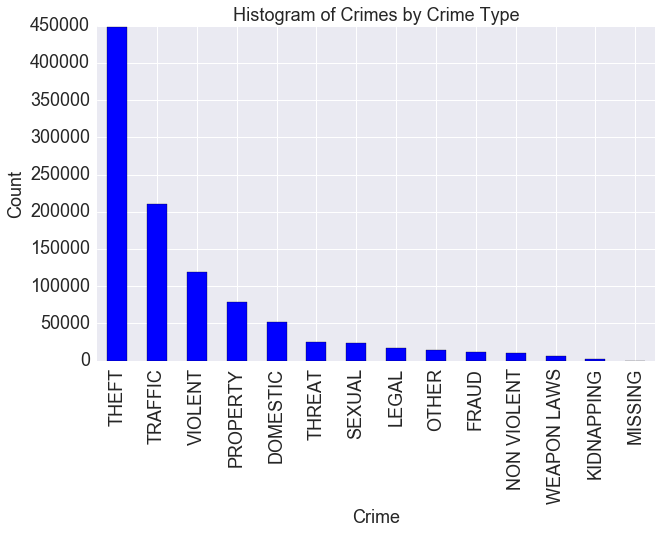

In [7]:
plt.figure(figsize=(10,6))
crime_data['simple_bucket'].value_counts().plot(kind='bar')
plt.tick_params(axis='x', labelsize=18)
plt.xticks(rotation='vertical')
plt.tick_params(axis='y', labelsize=18)
plt.title("Histogram of Crimes by Crime Type", fontsize=18)
plt.xlabel("Crime", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.savefig("hist_crimes_by_crime_type.png", bbox_inches="tight")

## Histogram of Crimes by Police Station

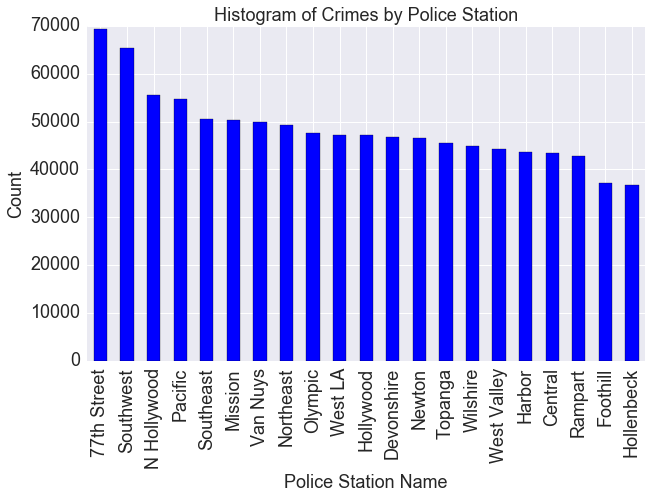

In [8]:
plt.figure(figsize=(10,6))
crime_data['area_name'].value_counts().plot(kind='bar')
plt.tick_params(axis='x', labelsize=18)
plt.xticks(rotation='vertical')
plt.tick_params(axis='y', labelsize=18)
plt.title("Histogram of Crimes by Police Station", fontsize=18)
plt.xlabel("Police Station Name", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.savefig("hist_crimes_by_police_station.png", bbox_inches="tight")

## Histogram of Crimes in each Police Station

Making a list for all the police stations in LA county.

In [9]:
pol_station_lst = list(crime_data["area_name"].value_counts().index)
print pol_station_lst
print "Total number of Police Stations: ", len(pol_station_lst)

['77th Street', 'Southwest', 'N Hollywood', 'Pacific', 'Southeast', 'Mission', 'Van Nuys', 'Northeast', 'Olympic', 'West LA', 'Hollywood', 'Devonshire', 'Newton', 'Topanga', 'Wilshire', 'West Valley', 'Harbor', 'Central', 'Rampart', 'Foothill', 'Hollenbeck']
Total number of Police Stations:  21


Making histograms of the crime types for the first 12 police station in pol_station_lst

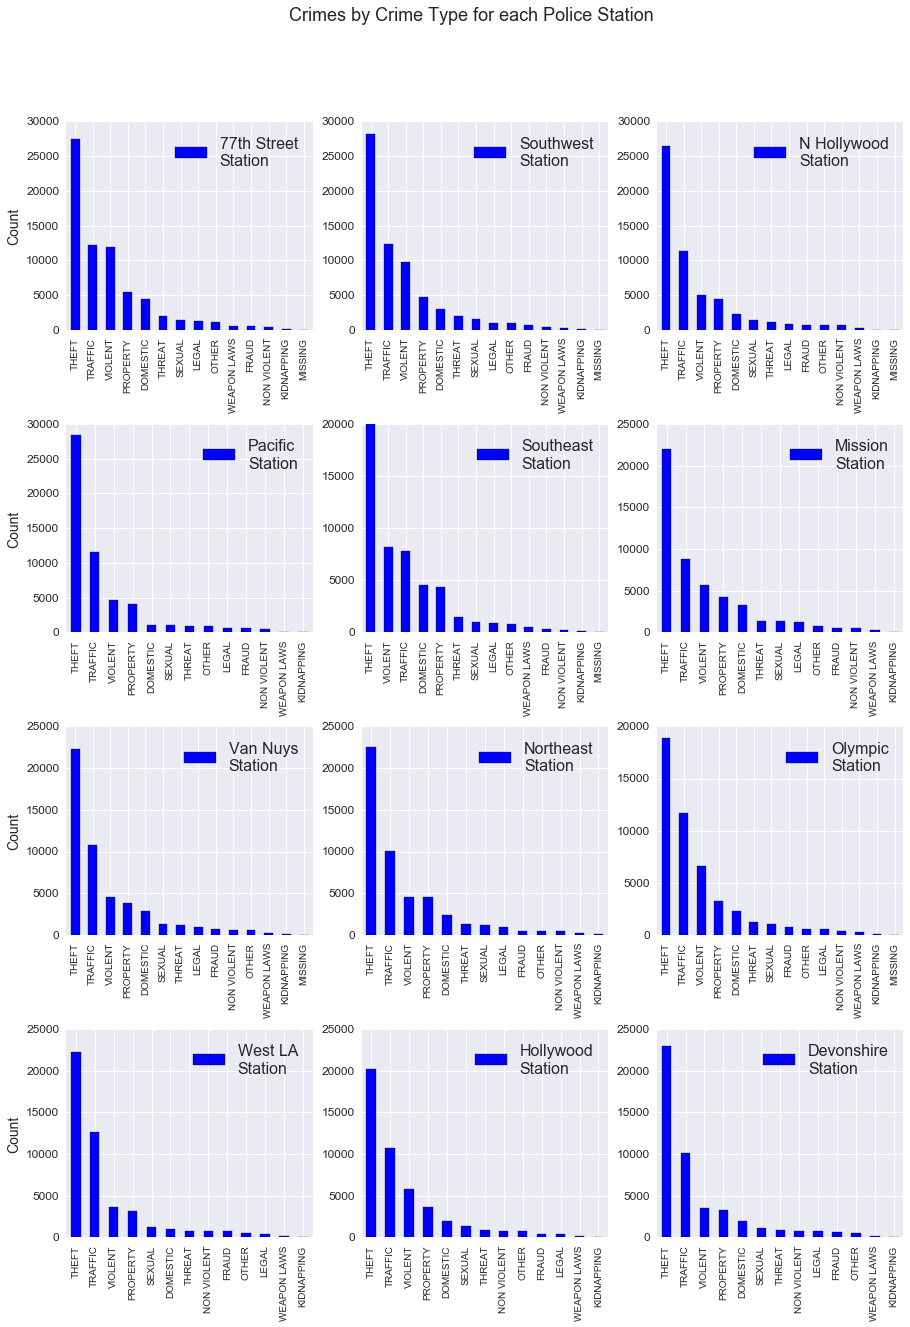

In [10]:
plt.figure(figsize=(15,20))

for i in xrange(12):
    
    plt.subplot(4,3,i+1)
    
    crime_data[ crime_data["area_name"] == pol_station_lst[i] ]['simple_bucket'].value_counts().plot(kind='bar', 
                                                                    label = pol_station_lst[i] + "\nStation")
    
    plt.tick_params(axis='x', labelsize=10)
    plt.xticks(rotation='vertical')
    if (i+1==1 or i+1==4 or i+1==7 or i+1==10):
        plt.ylabel("Count", fontsize=14)
    plt.tick_params(axis='y', labelsize=12)
    plt.legend(loc = "upper right", fontsize=16)
    
# The command below gives more vertical space between subplots
plt.subplots_adjust(hspace=.45)
plt.suptitle("Crimes by Crime Type for each Police Station",  fontsize=18) 

plt.savefig("hist_crimes_by_crime_type_for_each_station_1.png", bbox_inches="tight")

Making histograms of the crime types for the last 9 police station in pol_station_lst

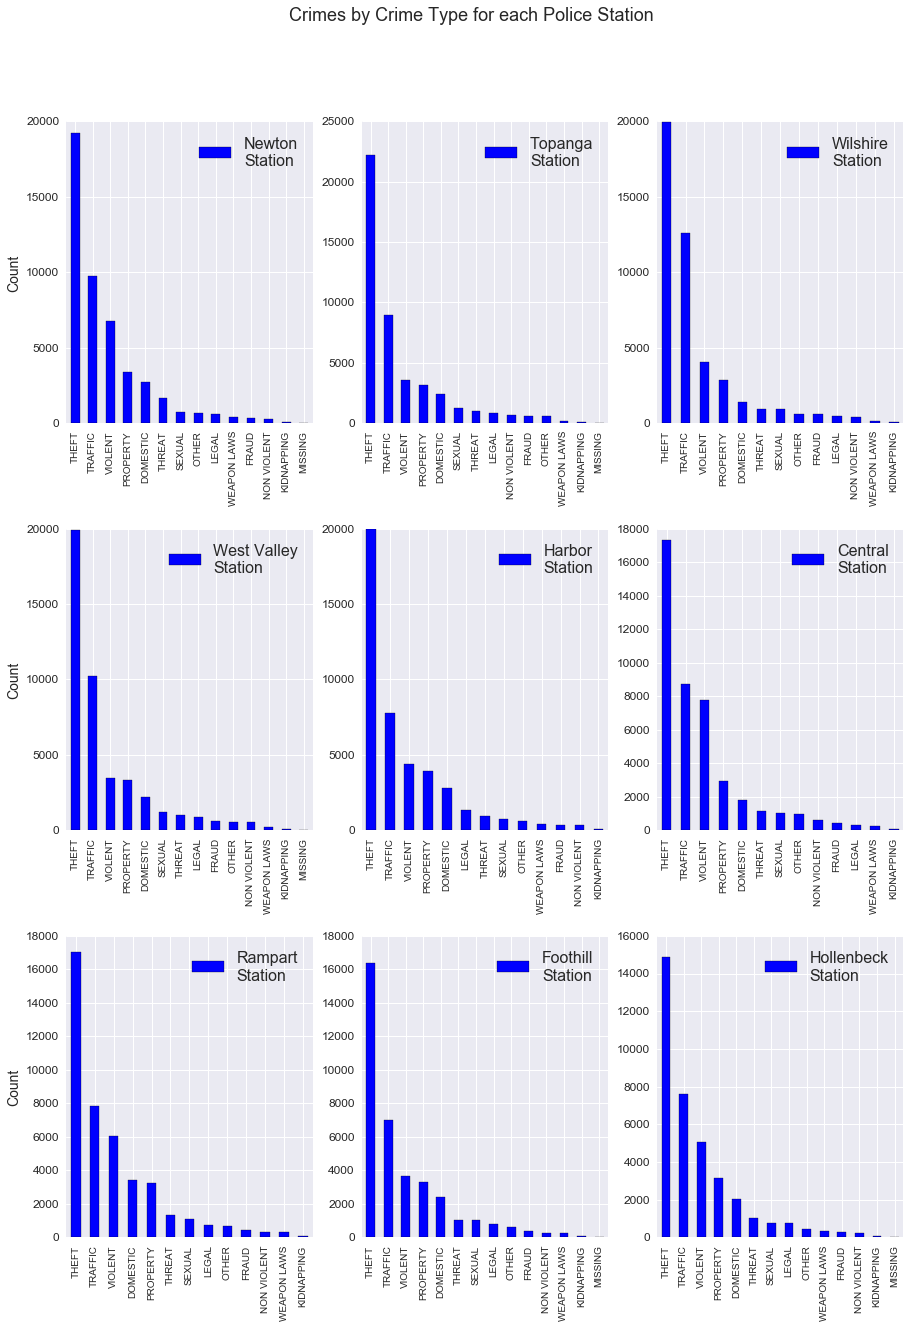

In [11]:
plt.figure(figsize=(15,20))

for i in xrange(9):
    
    plt.subplot(3,3,i+1)
    
    crime_data[ crime_data["area_name"] == pol_station_lst[i+12] ]['simple_bucket'].value_counts().plot(kind='bar', 
                                                                    label = pol_station_lst[i+12] + "\nStation")
    
    plt.tick_params(axis='x', labelsize=10)
    plt.xticks(rotation='vertical')
    if (i+1==1 or i+1==4 or i+1==7):
        plt.ylabel("Count", fontsize=14)
    plt.tick_params(axis='y', labelsize=12)
    plt.legend(loc = "upper right", fontsize=16)
    
# The command below gives more vertical space between subplots
plt.subplots_adjust(hspace=.35)
plt.suptitle("Crimes by Crime Type for each Police Station",  fontsize=18) 

plt.savefig("hist_crimes_by_crime_type_for_each_station_2.png", bbox_inches="tight")

## Re-defining the time_occ column

This column contains the the time the crime occured in a integer. Format lost when data downloaded from excel.

Creating a function that will take an integer as input. The integer will be converted to a string and extra 0s will the padded to the front to make the string 4 values. Then, we will extract the first 2 parts of the string, which will be the hour part. The last 2 parts of the string will convert minutes to fraction of an hour by dividing by 60.0

In [12]:
def convert_time_to_decimal_hours(x):
    
    x = str(x).zfill(4)
    
    time_hour = float(x[0:2])
    time_min = float( format( float(x[2:])/60.0 , ".2f") )
    
    time_out = time_hour + time_min
    
    return time_out

Applying this function to all the columns of the "TIME OCC" column.

In [13]:
crime_data["time_occ"] = crime_data["time_occ"].apply( convert_time_to_decimal_hours )

## Plotting crimes by crime type and time of day

Creating a list for the different crime types.

In [14]:
crime_types_lst = list(crime_data["simple_bucket"].value_counts().index)
print crime_types_lst
print "Total number of crimes: ", len(crime_types_lst)

['THEFT', 'TRAFFIC', 'VIOLENT', 'PROPERTY', 'DOMESTIC', 'THREAT', 'SEXUAL', 'LEGAL', 'OTHER', 'FRAUD', 'NON VIOLENT', 'WEAPON LAWS', 'KIDNAPPING', 'MISSING']
Total number of crimes:  14


Setting up the bin endges and bin mid points. Bin edges will be for each hour, 1 to 24, in steps of 1. The bin midpoints will be at the middle of each bin.

In [15]:
bin_edges_time = np.arange(0.0,24.0+1.0,1.0)
bin_mid_pts_time = ( (bin_edges_time[0]+bin_edges_time[1])/2.0 + bin_edges_time )[:-1]
#print bin_edges_time
#print bin_mid_pts_time

Setting up a simple function to get the subplot number for each crime. It will allow for only 3 plots in each subplot.

In [16]:
def curr_sub_plot_num_crime_type(x):
    if x<3:
        sub_plot_num = 1
    elif x>=3 and x<6:
        sub_plot_num = 2
    elif x>=6 and x<9:
        sub_plot_num = 3
    elif x>=9 and x<12:
        sub_plot_num = 4    
    else:
        sub_plot_num = 5
    return sub_plot_num    

Creating figure for crime type for each hour.

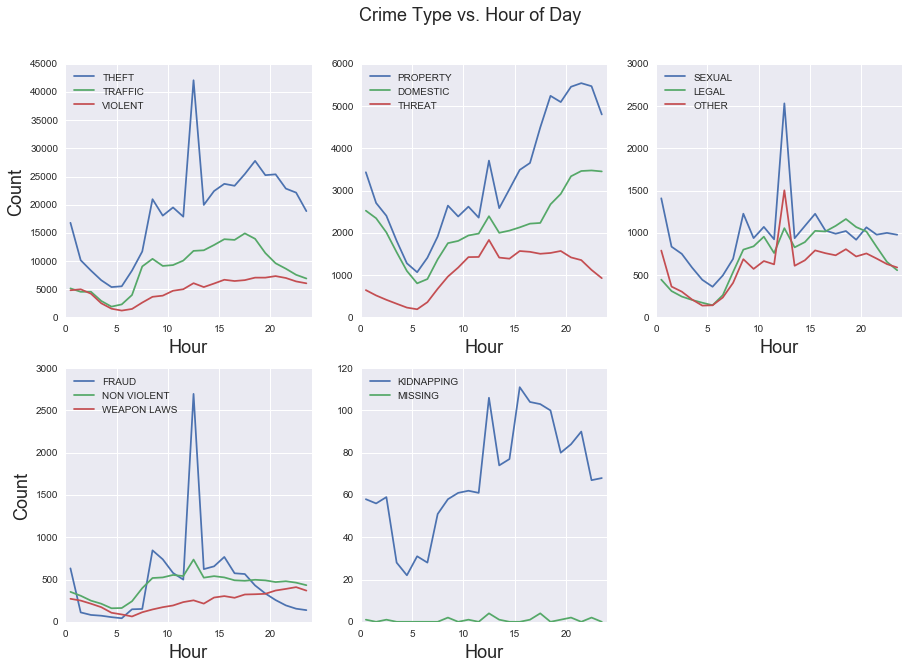

In [17]:
plt.figure(figsize=(15,10))
# Looping over all the crimes
for i, crime in enumerate(crime_types_lst):
    
    # Binning the data of each crime into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "simple_bucket" ] == crime ]["time_occ"].values, bins=bin_edges_time)[0]
    
    # Plotting each crime over time
    plt.subplot(2,3, curr_sub_plot_num_crime_type(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_time, y_vals, label = crime_types_lst[i] )
    plt.xlabel("Hour", fontsize=18)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_crime_type(i)==1 or curr_sub_plot_num_crime_type(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    plt.xlim((0.0,24.0))
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crime Type vs. Hour of Day",  fontsize=18)        

# Saving the figure
plt.savefig("crime_type_vs_hour_of_day.png", bbox_inches="tight")



## Plotting crimes by crime type and month

Setting up the bin endges and bin mid points. Bin edges will be for each month, 1 to 12, in steps of 1. The bin midpoints will be at the middle of each bin.

In [18]:
bin_edges_month = np.arange(1.0,13.0+1.0,1.0)
bin_mid_pts_month = bin_edges_month[:-1]
#print bin_edges_month
#print bin_mid_pts_month

Creating figure for crime type for each month.

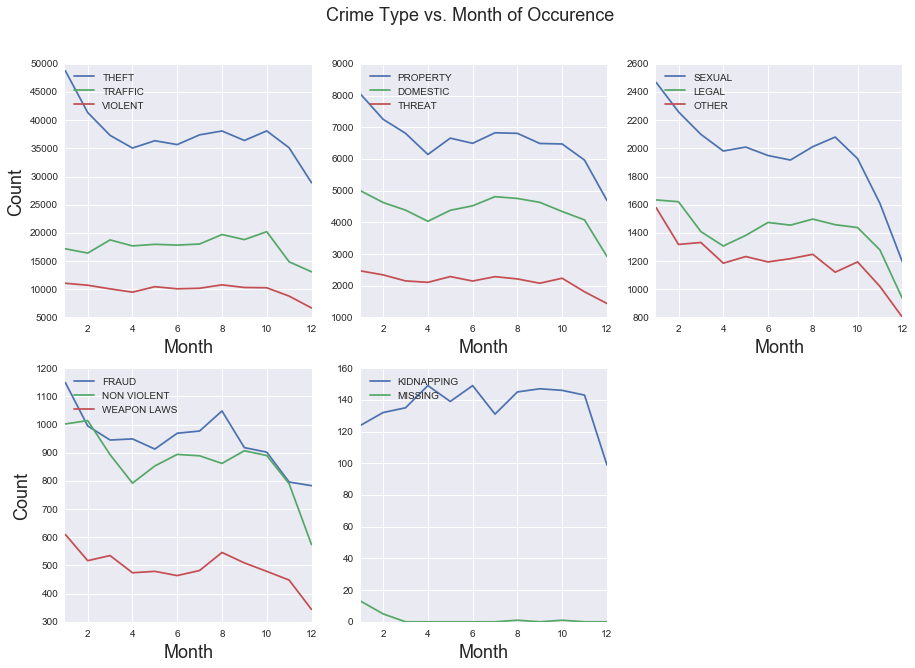

In [19]:
plt.figure(figsize=(15,10))
# Looping over all the crimes
for i, crime in enumerate(crime_types_lst):
    
    # Binning the data of each crime into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "simple_bucket" ] == crime ]["month"].values, bins=bin_edges_month)[0]
    
    # Plotting each crime over time
    plt.subplot(2,3,curr_sub_plot_num_crime_type(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_month, y_vals, label = crime_types_lst[i] )
    plt.xlabel("Month", fontsize=18)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_crime_type(i)==1 or curr_sub_plot_num_crime_type(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    plt.xlim((1.0,12.0))
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crime Type vs. Month of Occurence",  fontsize=18)        

# Saving the figure
plt.savefig("crime_type_vs_month.png", bbox_inches="tight")


## Plotting crimes by Police Station and time of day

In [20]:
print pol_station_lst
print "Total number of Police Stations: ", len(pol_station_lst)

['77th Street', 'Southwest', 'N Hollywood', 'Pacific', 'Southeast', 'Mission', 'Van Nuys', 'Northeast', 'Olympic', 'West LA', 'Hollywood', 'Devonshire', 'Newton', 'Topanga', 'Wilshire', 'West Valley', 'Harbor', 'Central', 'Rampart', 'Foothill', 'Hollenbeck']
Total number of Police Stations:  21


Setting up a simple function to get the subplot number for each police station. It will allow for only 3 or 4 plots in each subplot.

In [21]:
def curr_sub_plot_num_pol_station(x):
    if x<4:
        sub_plot_num = 1
    elif x>=4 and x<8:
        sub_plot_num = 2
    elif x>=8 and x<12:
        sub_plot_num = 3
    elif x>=12 and x<15:
        sub_plot_num = 4
    elif x>=15 and x<18:
        sub_plot_num = 5    
    else:
        sub_plot_num = 6
    return sub_plot_num    

Creating figure for crimes each hour for police station

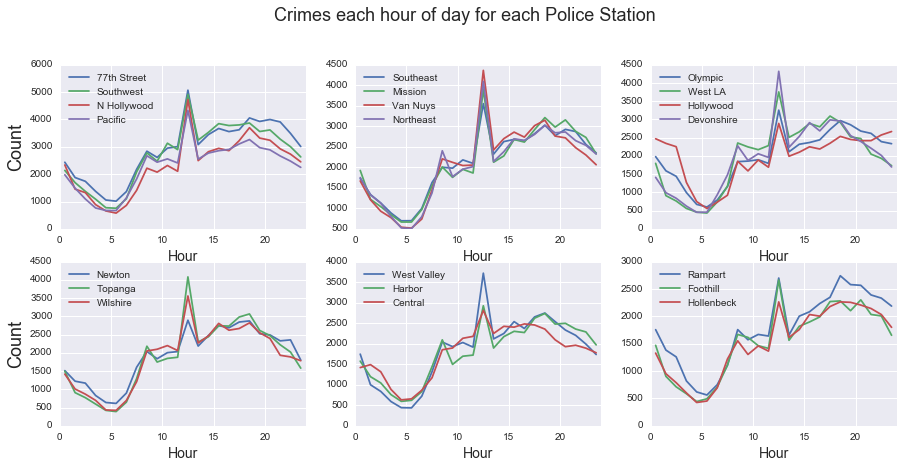

In [22]:
plt.figure(figsize=(15,10))
# Looping over all the police stations
for i, station in enumerate(pol_station_lst):
    
    # Binning the data of each station into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "area_name" ] == station ]["time_occ"].values, bins=bin_edges_time)[0]
    
    # Plotting each station data over time
    plt.subplot(3,3, curr_sub_plot_num_pol_station(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_time, y_vals, label = pol_station_lst[i] )
    plt.xlabel("Hour", fontsize=14)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_pol_station(i)==1 or curr_sub_plot_num_pol_station(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    plt.xlim((0.0,24.0))
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crimes each hour of day for each Police Station",  fontsize=18)        

# Saving the figure
plt.savefig("police_station_vs_hour_of_day.png", bbox_inches="tight")

## Plotting crimes by Police Station and month

Creating figure for crimes each month for police station

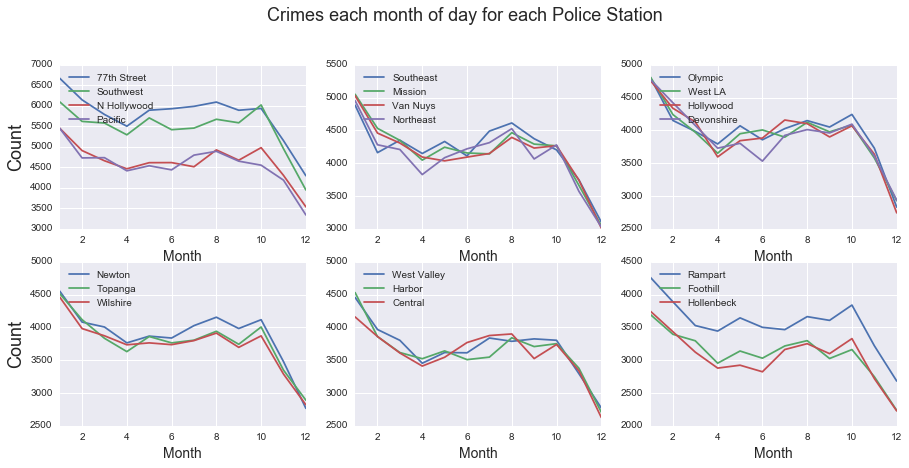

In [23]:
plt.figure(figsize=(15,10))
# Looping over all the crimes
for i, station in enumerate(pol_station_lst):
    
    # Binning the data of each crime into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "area_name" ] == station ]["month"].values, bins=bin_edges_month)[0]
    
    # Plotting each crime over time
    plt.subplot(3,3,curr_sub_plot_num_pol_station(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_month, y_vals, label = pol_station_lst[i] )
    plt.xlabel("Month", fontsize=14)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_pol_station(i)==1 or curr_sub_plot_num_pol_station(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    plt.xlim((1.0,12.0))
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crimes each month of day for each Police Station",  fontsize=18)         

# Saving the figure
plt.savefig("police_station_vs_month.png", bbox_inches="tight")

## Scatterplot of Police Stations

Loading a dataset which contains the GPS coordinates of police stations. 

In [24]:
police_station_data = pd.read_csv("LAPD_Police_Station_GPS_Coord.csv")

Printing the list of Police Stations

In [25]:
print pol_station_lst
print len(pol_station_lst)

['77th Street', 'Southwest', 'N Hollywood', 'Pacific', 'Southeast', 'Mission', 'Van Nuys', 'Northeast', 'Olympic', 'West LA', 'Hollywood', 'Devonshire', 'Newton', 'Topanga', 'Wilshire', 'West Valley', 'Harbor', 'Central', 'Rampart', 'Foothill', 'Hollenbeck']
21


Looking at the first few entries of the Police Station coordinates data.

In [26]:
police_station_data.head()

,Police Station,Latitude,Longitude
0,77th Street,33.970670,-118.277479
1,Southwest,34.010560,-118.307420
2,N Hollywood,34.171659,-118.388084
3,Pacific,33.991576,-118.422067
4,Southeast,33.938779,-118.276503


Storing the Longitudes and Latitudes into arrays.

In [27]:
pol_stat_longs = police_station_data["Longitude"].values
pol_stat_lats = police_station_data["Latitude"].values

Loading the data for police station boundaries.

In [28]:
pol_stat_boundaries = pd.read_csv("LA_Police_Station_Boundaries.csv")

In [29]:
pol_stat_boundaries.head()

,area_name,Long_Boundary,Lat_Boundary
0,77th Street,-118.314895,34.003717
1,77th Street,-118.281062,34.003781
2,77th Street,-118.281025,34.001341
3,77th Street,-118.280468,33.994881
4,77th Street,-118.280505,33.983225


Making a figure for the 

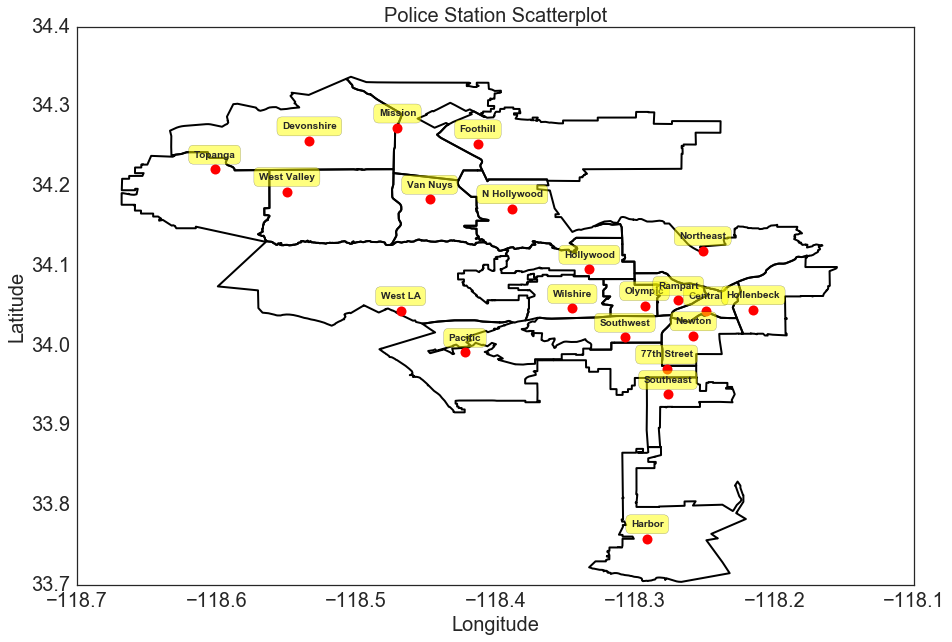

In [30]:
plt.figure(figsize=(15,10))
sns.set_style("white")
#
plt.hold(True)
#
for station in pol_station_lst:
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=2) 
#
#
plt.plot(pol_stat_longs, pol_stat_lats, '.', color="red", markersize = 20)

for label, x, y in zip(pol_station_lst, pol_stat_longs, pol_stat_lats):
    plt.annotate(
        label, xy = (x, y), xytext = (0, 10),
        textcoords = 'offset points', horizontalalignment = 'center', verticalalignment = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), fontsize=10, fontweight='bold' )
#
plt.hold(False)   
#    
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel("Longitude", fontsize=20)  
plt.ylabel("Latitude", fontsize=20) 
plt.title("Police Station Scatterplot", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("police_station_scatterplot.png", bbox_inches="tight")



## Scatterplot of all crimes and all Police Stations

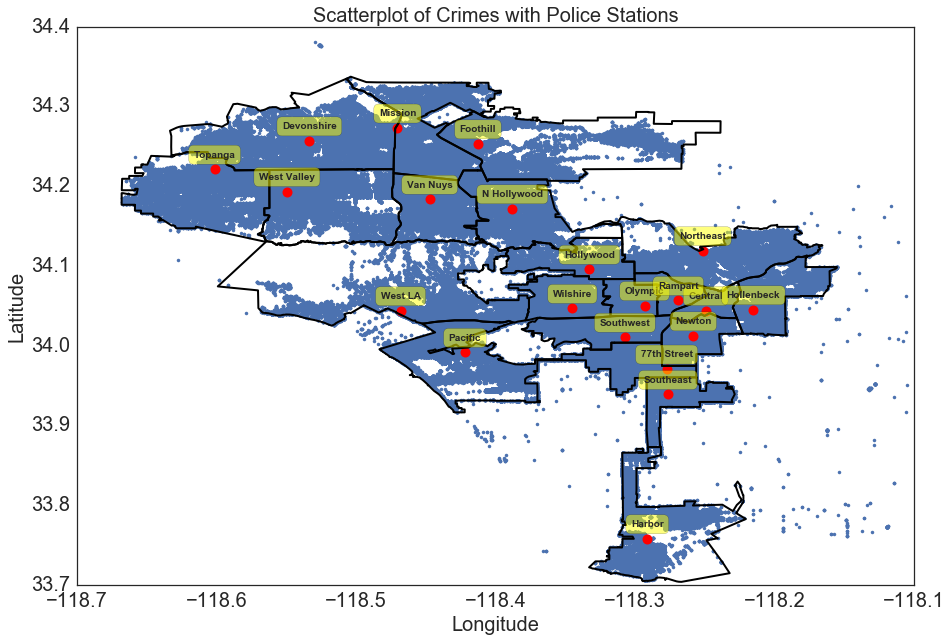

In [31]:
plt.figure(figsize=(15,10))
sns.set_style("white")

plt.hold(True)
#
long_vals = crime_data["long"].values
lat_vals = crime_data["lat"].values
plt.plot(long_vals, lat_vals, ".")    
#
plt.plot(pol_stat_longs, pol_stat_lats, '.', color="red", markersize = 20)

for label, x, y in zip(pol_station_lst, pol_stat_longs, pol_stat_lats):
    plt.annotate(
        label, xy = (x, y), xytext = (0, 10),
        textcoords = 'offset points', horizontalalignment = 'center', verticalalignment = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), fontsize=10, fontweight='bold' )
#
#
for station in pol_station_lst:
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=2) 
#
#
plt.hold(False)
#    
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlim([-118.7,-118.1])
plt.ylim([33.7,34.4])
plt.xlabel("Longitude", fontsize=20)  
plt.ylabel("Latitude", fontsize=20) 
plt.title("Scatterplot of Crimes with Police Stations", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("pol_stat_and_crimes_scat_plot.png", bbox_inches="tight")

## Scatterplot for crimes in each Police Station

Doing the scatterplot for the first 12 police stations.

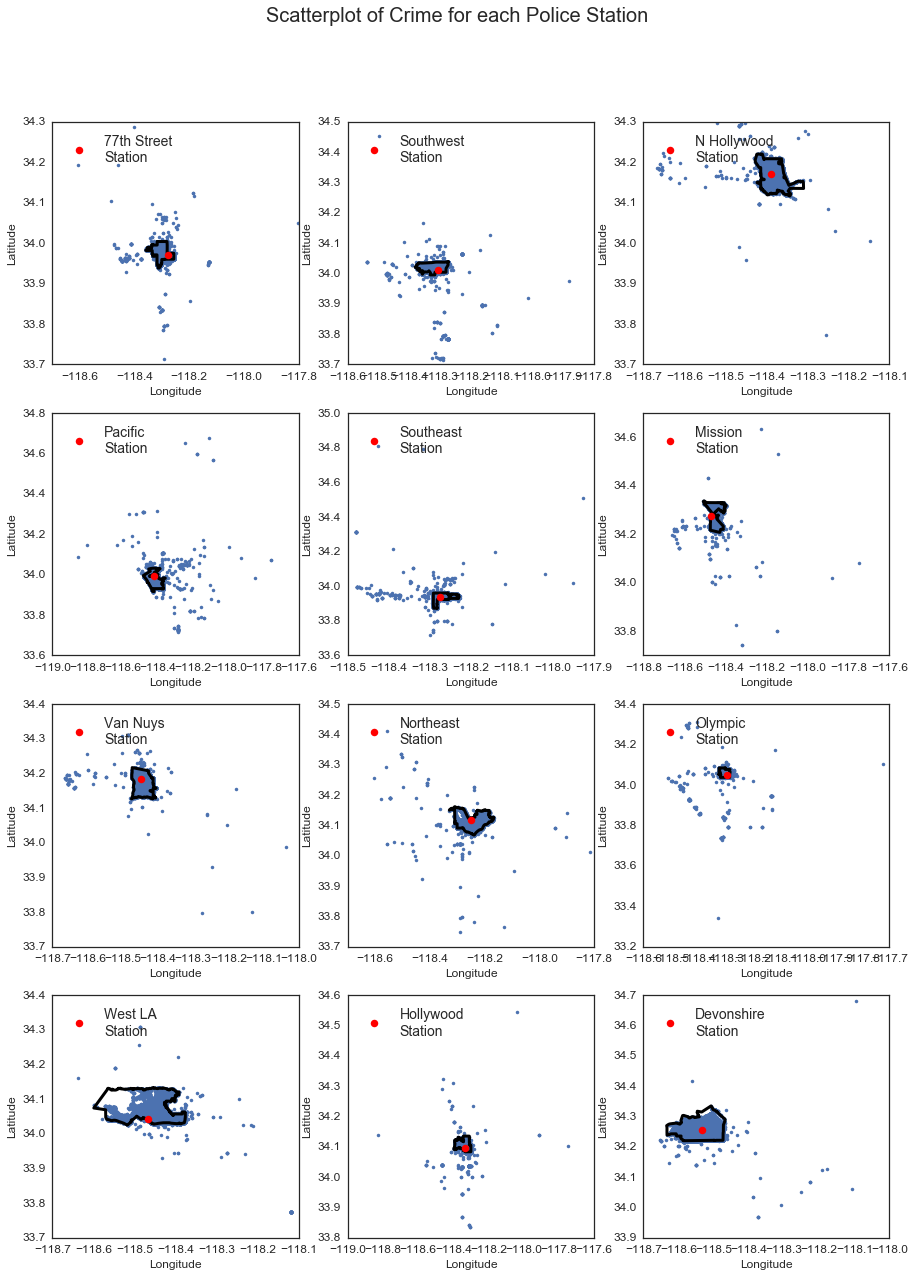

In [32]:
plt.figure(figsize=(15,20))

for i in xrange(12):
    
    pol_stat_df = ( crime_data[ crime_data["area_name"] == pol_station_lst[i] ][ ['lat', 'long'] ] ).dropna()
    long_vals = pol_stat_df["long"].values
    lat_vals = pol_stat_df["lat"].values
        
    plt.subplot(4,3, i+1)
    plt.hold(True)
    plt.plot(long_vals, lat_vals, ".")
    
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_station_lst[i] ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_station_lst[i] ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=3)
    
    plt.plot(pol_stat_longs[i], pol_stat_lats[i], '.', color="red", 
             markersize = 15, label= pol_station_lst[i] + "\nStation")
    plt.legend(loc = "upper left", fontsize = 14 )
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel("Longitude", fontsize=12)  
    plt.ylabel("Latitude", fontsize=12) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
     
    
    #plt.annotate( pol_station_lst[i], xy = (pol_stat_longs[i], pol_stat_lats[i]), xytext = (0, 10),
    #textcoords = 'offset points', horizontalalignment = 'center', verticalalignment = 'bottom',
    #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), fontsize=10 )


# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Scatterplot of Crime for each Police Station", fontsize=20)         

# Saving the figure
plt.savefig("scatt_plot_crime_each_pol_stat_1.png", bbox_inches="tight")

Doing the scatterplot for the last 9 police stations.

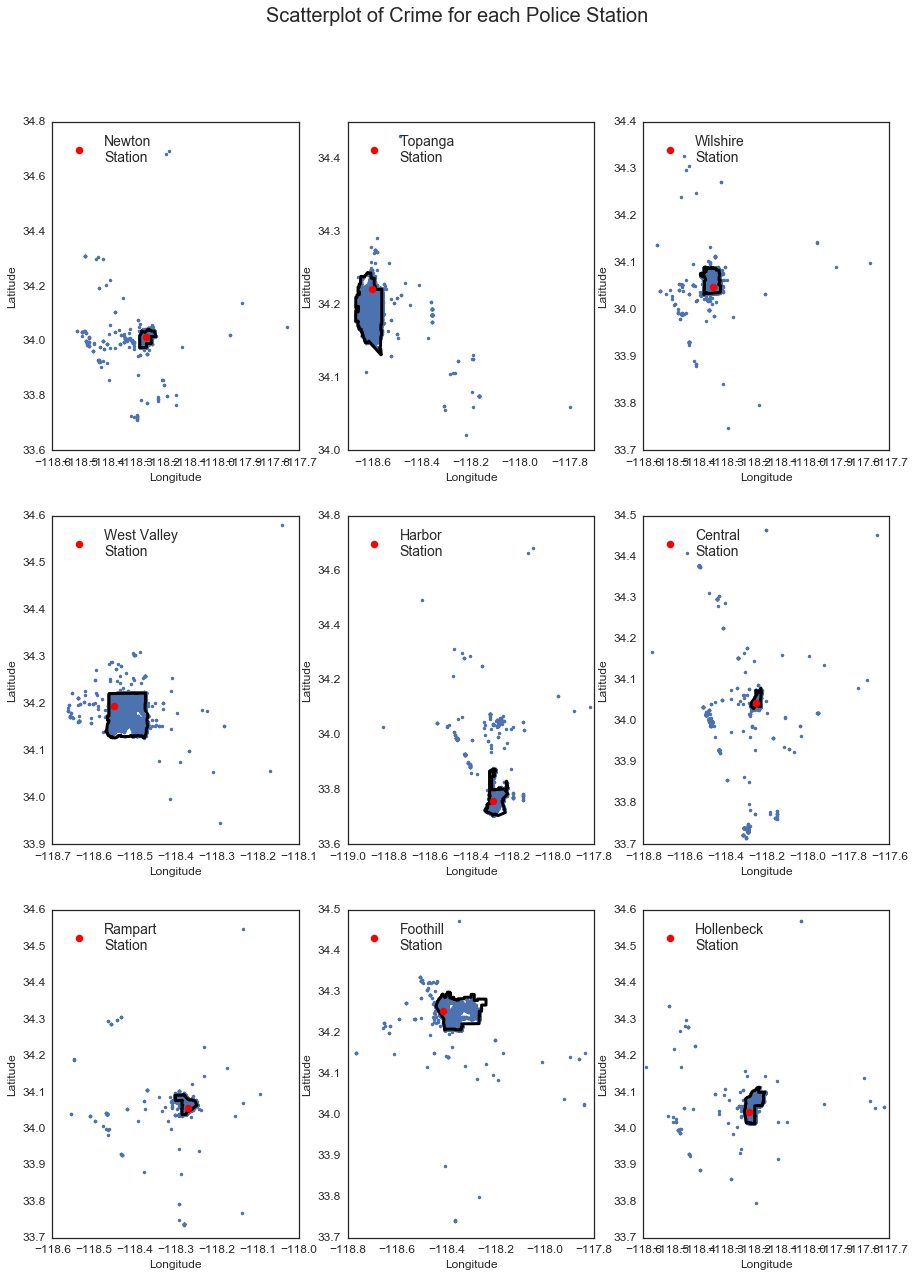

In [33]:
plt.figure(figsize=(15,20))

for i in xrange(9):
    
    pol_stat_df = ( crime_data[ crime_data["area_name"] == pol_station_lst[i+12] ][ ['lat', 'long'] ] ).dropna()
    long_vals = pol_stat_df["long"].values
    lat_vals = pol_stat_df["lat"].values
        
    plt.subplot(3,3, i+1)
    plt.hold(True)
    plt.plot(long_vals, lat_vals, ".")
    
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_station_lst[i+12] ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_station_lst[i+12] ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=3)
    
    plt.plot(pol_stat_longs[i+12], pol_stat_lats[i+12], '.', color="red", 
             markersize = 15, label= pol_station_lst[i+12] + "\nStation")
    plt.legend(loc = "upper left", fontsize = 14 )
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel("Longitude", fontsize=12)  
    plt.ylabel("Latitude", fontsize=12) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    #plt.annotate( pol_station_lst[i], xy = (pol_stat_longs[i], pol_stat_lats[i]), xytext = (0, 10),
    #textcoords = 'offset points', horizontalalignment = 'center', verticalalignment = 'bottom',
    #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), fontsize=10 )


# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Scatterplot of Crime for each Police Station", fontsize=20)         

# Saving the figure
plt.savefig("scatt_plot_crime_each_pol_stat_2.png", bbox_inches="tight")

## Adding the Police Station Lat and Long to the Crime Data dataframe

Defining a new column called "pol_stat_lat", which stores the latitude of the police station where each crime occured.
A function is applied to the area_name column. The area name is used to find the index in the police station list. Then, the latitude is returned from the police station latitude array.

In [34]:
crime_data["pol_stat_lat"] = crime_data["area_name"].apply( lambda df_row: 
                                                           pol_stat_lats[ pol_station_lst.index(df_row) ]  )

Defining a new column called "pol_stat_long", which stores the longitude of the police station where each crime occured. A function is applied to the area_name column. The area name is used to find the index in the police station list. Then, the longitude is returned from the police station longitude array.

In [35]:
crime_data["pol_stat_long"] = crime_data["area_name"].apply( lambda df_row: 
                                                            pol_stat_longs[ pol_station_lst.index(df_row) ]  )

## Calculating the distance each crime occured from each police station

Defining a function to calculate the distance between 2 points, given in latitude and longitude.

In [36]:
def haversine(input_df):
    
    lat1 = input_df["pol_stat_lat"]
    lon1 = input_df["pol_stat_long"]
    
    lat2 = input_df["lat"]
    lon2 = input_df["long"]
 
    R = 3959.0 # Earth radius in kilometers
 
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
 
    a = math.sin(dLat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dLon/2)**2
    c = 2*math.asin(math.sqrt(a))
 
    return R * c

Creating a column that computes distance each crime occured from each police station.

In [37]:
crime_data["dist_from_pol_stat_in_mi"] = crime_data.apply( haversine, axis=1 )

Now, droping the "pol_stat_lat" and "pol_stat_long" from the crime_data dataframe since we dont need them anymore. 

In [38]:
crime_data.drop('pol_stat_lat', axis=1, inplace=True)
crime_data.drop('pol_stat_long', axis=1, inplace=True)

## Plotting the distance of crimes from the Police Station

When making this plot, we are dropping the NA values.

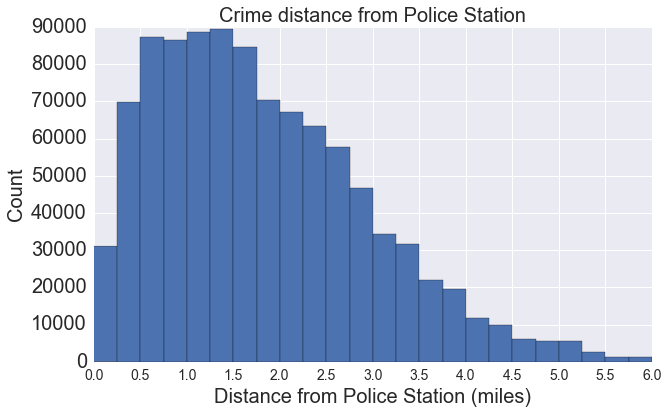

In [39]:
# Setting up the "darkgrid" background again for seaborn
sns.set_style('darkgrid')

# Setting up the bins for the histogram
bin_step = 0.25
bin_edges = np.arange(0.0,6.0+bin_step,bin_step)

# Setting up the figure size
plt.figure(figsize=(10,6))

# Plotting the histogram and customizing the figure properties
plt.hist(crime_data["dist_from_pol_stat_in_mi"].dropna().values, bins = bin_edges) 
plt.xlabel("Distance from Police Station (miles)", fontsize=20) 
plt.ylabel("Count", fontsize=20) 
plt.title("Crime distance from Police Station", fontsize=20)
plt.xticks( np.arange(0.0,6.0+0.5,0.5), fontsize=14) 
plt.yticks(fontsize=20) 

# Saving the figure
plt.savefig("hist_crime_dist_from_pol_station.png", bbox_inches="tight")

## Distance of each crime type from Police Station

Setting up the bins for the histogram

In [40]:
# Setting up the bins for the histogram
bin_step = 0.25
bin_edges = np.arange(0.0,6.0+bin_step,bin_step)

Histogram for 6 of the crimes.

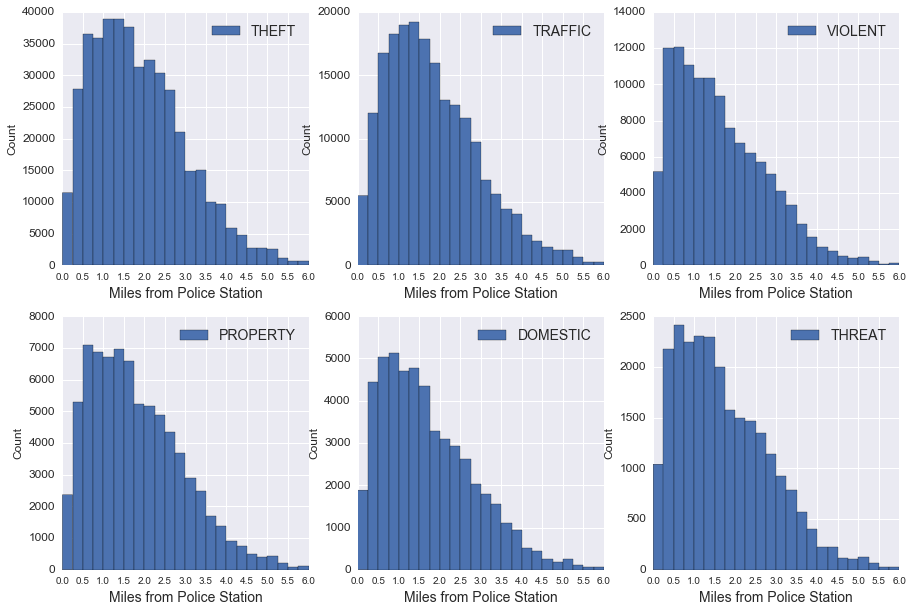

In [41]:
# Setting up the figure size
plt.figure(figsize=(15,10))

for i in xrange(6):
    
    plt.subplot(2,3, i+1)
    
    plt.hold(True)
    
    # Plotting the histogram and customizing the figure properties
    plt.hist(crime_data[ crime_data["simple_bucket"] == crime_types_lst[i] ]["dist_from_pol_stat_in_mi"].dropna().values, 
                         bins = bin_edges , label = crime_types_lst[i]) 
    plt.xlabel("Miles from Police Station", fontsize=14) 
    plt.ylabel("Count", fontsize=12) 
    plt.xticks( np.arange(0.0,6.0+0.5,0.5), fontsize=10) 
    plt.yticks(fontsize=12)
    plt.legend(loc = "upper right", fontsize = 14)

# Saving the figure
plt.savefig("hist_crime_dist_for_6_diff_crimes.png", bbox_inches="tight")    

Histogram for 6 of the crimes.

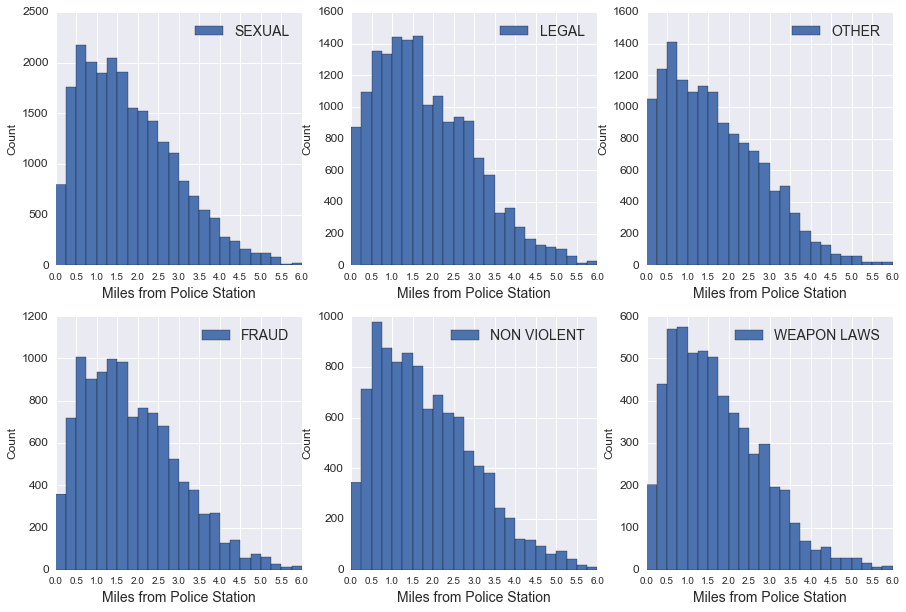

In [42]:
# Setting up the figure size
plt.figure(figsize=(15,10))

for i in xrange(6,12):
    
    plt.subplot(2,3, i-5)
    
    plt.hold(True)
    
    # Plotting the histogram and customizing the figure properties
    plt.hist(crime_data[ crime_data["simple_bucket"] == crime_types_lst[i] ]["dist_from_pol_stat_in_mi"].dropna().values, 
                         bins = bin_edges , label = crime_types_lst[i]) 
    plt.xlabel("Miles from Police Station", fontsize=14) 
    plt.ylabel("Count", fontsize=12) 
    plt.xticks( np.arange(0.0,6.0+0.5,0.5), fontsize=10) 
    plt.yticks(fontsize=12)
    plt.legend(loc = "upper right", fontsize = 14)

Histogram for 2 of the crimes.

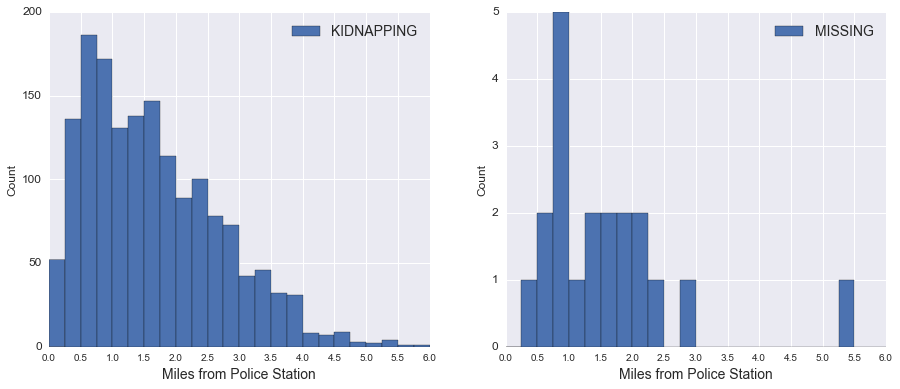

In [43]:
# Setting up the figure size
plt.figure(figsize=(15,6))

for i in xrange(12,14):
    
    plt.subplot(1,2, i-11)
    
    plt.hold(True)
    
    # Plotting the histogram and customizing the figure properties
    plt.hist(crime_data[ crime_data["simple_bucket"] == crime_types_lst[i] ]["dist_from_pol_stat_in_mi"].dropna().values, 
                         bins = bin_edges , label = crime_types_lst[i]) 
    plt.xlabel("Miles from Police Station", fontsize=14) 
    plt.ylabel("Count", fontsize=12) 
    plt.xticks( np.arange(0.0,6.0+0.5,0.5), fontsize=10) 
    plt.yticks(fontsize=12)
    plt.legend(loc = "upper right", fontsize = 14)

## Working with Street Lights

Loading the processed street light data, where the longitude and latitude data have already been cleaned.

In [44]:
street_light_df = pd.read_csv("processed_lights_data.csv")

/Users/rodolfosantana/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the head of the street lights dataframe.

In [45]:
street_light_df.head(3)

,lat_long,status,st_lid,slid,last_plan,post_desc,lamp_a,lamp_b,lamp_c,lamp_d,lamp_e,lamp_f,long,lat
0,-118.47789298331 33.99161052287,AsBuilt,SL5552-53,198740,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,NaN,NaN,NaN,NaN,-118.477893,33.991611
1,-118.4780544035828 33.991794229239495,AsBuilt,SL5552-54,198741,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,NaN,NaN,NaN,NaN,-118.478054,33.991794
2,-118.47818784460596 33.991945985007504,AsBuilt,SL5552-55,198742,SL7332,25' Ameron Rnd Conc Pole,55W LED,55W LED,NaN,NaN,NaN,NaN,-118.478188,33.991946


Since we are only interested in the longitude and latitude of the street lights, we are keeping these columns and dropping the other columns from the dataframes.

In [46]:
drop_col_street_light_df = list(street_light_df.columns)[:-2]
street_light_df.drop( drop_col_street_light_df, axis=1, inplace=True)

Adding a column with empty strings that will hold the police station for each street light.

In [47]:
street_light_df["area_name"] = ""
street_light_df.head(3)

,long,lat,area_name
0,-118.477893,33.991611,
1,-118.478054,33.991794,
2,-118.478188,33.991946,


Converting the street light data into a matrix.

In [48]:
street_lights_matrix = street_light_df[["long", "lat"]].as_matrix()
street_lights_matrix

array([[-118.47789298,   33.99161052],
       [-118.4780544 ,   33.99179423],
       [-118.47818784,   33.99194599],
       ..., 
       [-118.31830508,   34.07109282],
       [-118.44681727,   34.02432416],
       [-118.28719113,   34.09062341]])

Looping over each police station. Putting the boundary of each police station into the path matplotlib class. Then, the countains_points method sees if each street light is in the current police station we are looking at. A boolean numpy array is returned. The entries of the area_name where the True boolean value is returned are updated with the current station in the for loop.

In [49]:
for station in pol_station_lst:
    
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Lat_Boundary"].values
    poly_points = np.concatenate( ( long_pol_bound.reshape(len(long_pol_bound),1),
                                    lat_pol_bound.reshape(len(lat_pol_bound),1) ), axis=1)
    
    poly_boundary = path.Path( poly_points )
    
    index_points_in_poly = poly_boundary.contains_points( street_lights_matrix )
    
    
    street_light_df["area_name"].iloc[index_points_in_poly] = station

/Users/rodolfosantana/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Looking at the head at the street_lights dataframe with the Police station corresponding to each street light now added.

In [50]:
street_light_df.head(3)

,long,lat,area_name
0,-118.477893,33.991611,Pacific
1,-118.478054,33.991794,Pacific
2,-118.478188,33.991946,Pacific


Removing the entries where the blank string was not replaced. There street lights do not belong to a particular police station.

In [51]:
street_light_df = \
street_light_df.drop(street_light_df[ street_light_df["area_name"] == "" ] .index)

Now, making a scatterplot of all the street lights to make sure none of the street lights fall out of the police station boundaries.

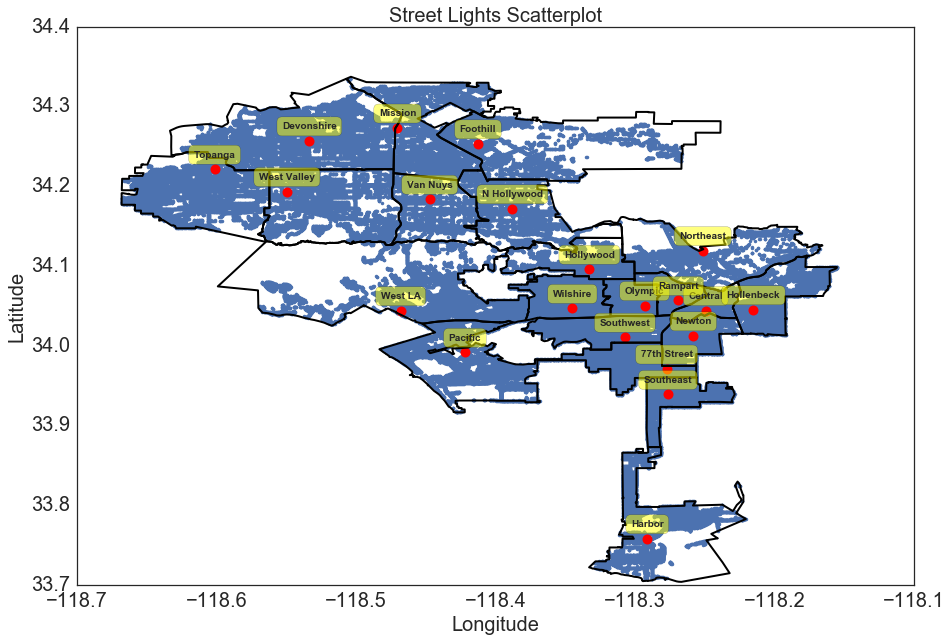

In [52]:
plt.figure(figsize=(15,10))
sns.set_style("white")

plt.hold(True)
#
long_vals = street_light_df["long"].values
lat_vals = street_light_df["lat"].values
plt.plot(long_vals, lat_vals, ".")    
#
plt.plot(pol_stat_longs, pol_stat_lats, '.', color="red", markersize = 20)

for label, x, y in zip(pol_station_lst, pol_stat_longs, pol_stat_lats):
    plt.annotate(
        label, xy = (x, y), xytext = (0, 10),
        textcoords = 'offset points', horizontalalignment = 'center', verticalalignment = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), fontsize=10, fontweight='bold' )
#
#
for station in pol_station_lst:
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == station ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=2) 
#
#
plt.hold(False)
#    
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlim([-118.7,-118.1])
plt.ylim([33.7,34.4])
plt.xlabel("Longitude", fontsize=20)  
plt.ylabel("Latitude", fontsize=20) 
plt.title("Street Lights Scatterplot", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("street_lights_scat_plot.png", bbox_inches="tight")

In [53]:
print pol_station_lst

['77th Street', 'Southwest', 'N Hollywood', 'Pacific', 'Southeast', 'Mission', 'Van Nuys', 'Northeast', 'Olympic', 'West LA', 'Hollywood', 'Devonshire', 'Newton', 'Topanga', 'Wilshire', 'West Valley', 'Harbor', 'Central', 'Rampart', 'Foothill', 'Hollenbeck']


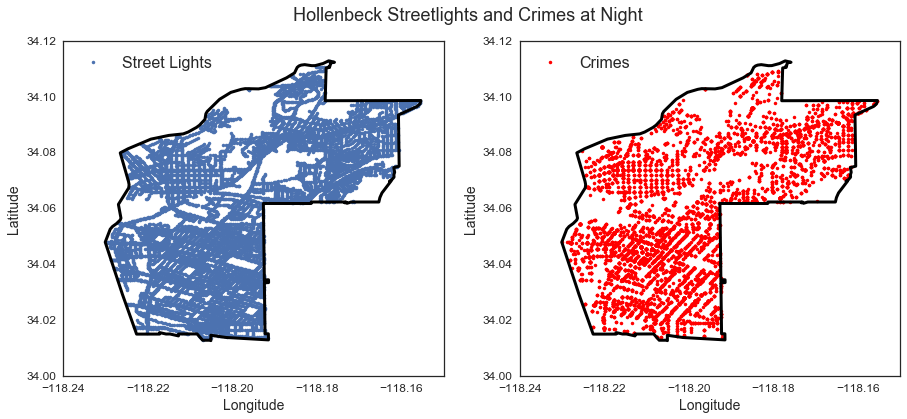

In [54]:
for pol_stat in pol_station_lst:
    #
    plt.figure(figsize=(15,6))
    #
    # ---- Current station we are analyzing
    #pol_stat = "Southwest"
    #
    #
    # --- Subsetting data we will be looking at by area_name and time of occurence ---
    #
    curr_PS_df = crime_data[ crime_data.area_name == pol_stat ]
    curr_sub_night_df = curr_PS_df[ (curr_PS_df.time_occ>=21.0) | (curr_PS_df.time_occ<=5.0) ][["long","lat"]]
    #
    # --- Making Polygon for current area_name  ---
    #
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_stat ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_stat ]["Lat_Boundary"].values

    poly_points = np.concatenate( ( long_pol_bound.reshape(len(long_pol_bound),1),
                                    lat_pol_bound.reshape(len(lat_pol_bound),1) ), axis=1)

    poly_boundary = path.Path( poly_points )
    #
    # --- Checking which point are not in the Polygon and removing them from the dataframe
    #
    index_points_in_poly = poly_boundary.contains_points( curr_sub_night_df.as_matrix() )
    #
    # --- Making the false point in the df into np.nan
    #
    curr_sub_night_df.iloc[np.invert(index_points_in_poly)] = np.nan
    #
    # --- Plotting Street Lights and Police Boundaries --- 
    #
    #
    plt.subplot(1,2,1)
    #
    plt.hold(True)
    #
    long_vals_street_light = street_light_df[ street_light_df["area_name"] == pol_stat ]["long"].values
    lat_vals_street_light = street_light_df[ street_light_df["area_name"] == pol_stat ]["lat"].values
    plt.plot(long_vals_street_light, lat_vals_street_light, ".", label="Street Lights")    
    #
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_stat ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_stat ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=3)
    #
    plt.hold(False)
    #
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel("Longitude", fontsize=14)  
    plt.ylabel("Latitude", fontsize=14) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc = "best", fontsize=16)
    #
    #
    plt.subplot(1,2,2)
    #
    plt.hold(True)
    #
    # --- Plotting crimes that fall into this subset
    #
    night_pol_sta_crimes_df = curr_sub_night_df.dropna()
    long_vals = night_pol_sta_crimes_df["long"].values
    lat_vals = night_pol_sta_crimes_df["lat"].values
    plt.plot(long_vals, lat_vals, ".", color="red", label="Crimes")
    #    
    # --- Plotting police boundaries
    #
    long_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_stat ]["Long_Boundary"].values
    lat_pol_bound = pol_stat_boundaries[ pol_stat_boundaries["area_name"] == pol_stat ]["Lat_Boundary"].values
    plt.plot(long_pol_bound, lat_pol_bound, '-', color="black", linewidth=3)
    # 
    plt.hold(False)    
    #
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel("Longitude", fontsize=14)  
    plt.ylabel("Latitude", fontsize=14) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc = "best", fontsize=16)
    #
    # Plotting a title for the entire figure       
    plt.hold(False)        
    plt.suptitle( pol_stat + " Streetlights and Crimes at Night", fontsize=18)         

    file_name_png = "Crimes_at_night_street_lights_" + pol_stat + ".png"

    # Saving the figure
    plt.savefig(file_name_png, bbox_inches="tight")
    
    # Show only the last figure in the for-loop
    if pol_stat != pol_station_lst[-1]:
        plt.close()